In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read csv file from google drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BUBT/Knowledge Engineering/onlinedeliverydata.csv')
df.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [ ]:
df.shape

(388, 55)

In [ ]:
# #Encode all the features

# from sklearn.preprocessing import LabelEncoder
# for column in df.columns:
#   if df[column].dtypes == 'object':
#     df[column] = LabelEncoder().fit_transform(df[column])


In [ ]:
# # Make Normalization with minmaxscaler all the features

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df.values)
# df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
# df.head()


In [ ]:
df['Occupation'].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

In [ ]:
df['Monthly Income'].value_counts()

No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64

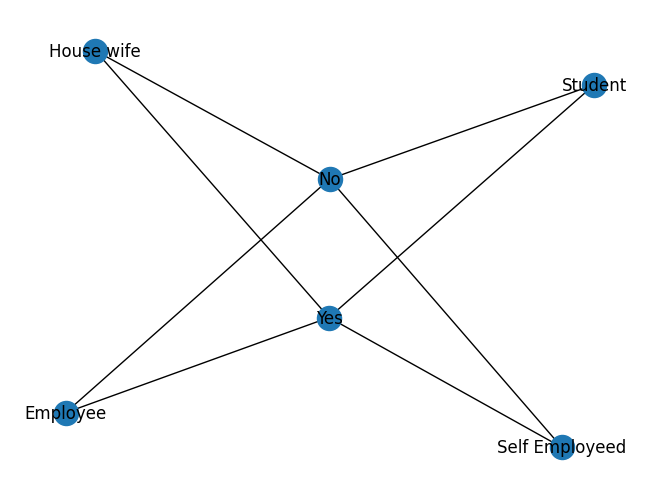

In [ ]:
# Visualize the bipartite graph, Extract Occupation and Output from the dataset and Add edges between Occupation and Output

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from(df['Occupation'].unique())
G.add_nodes_from(df['Output'].unique())

for i in range(len(df)):
  G.add_edge(df['Occupation'][i], df['Output'][i])

nx.draw(G, with_labels=True)
plt.show()


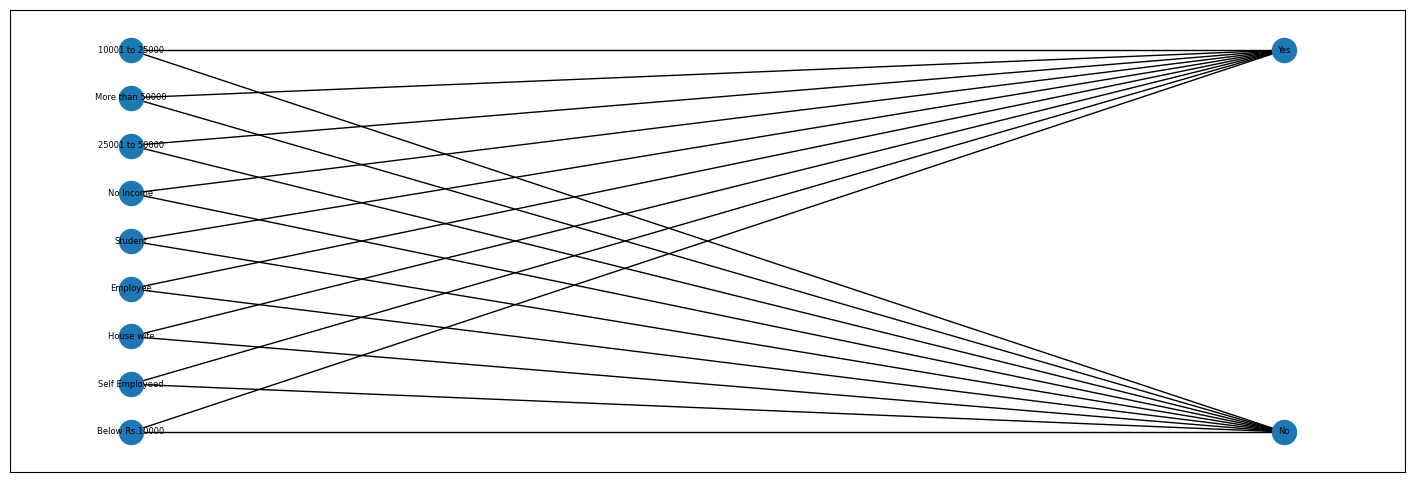

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty bipartite graph
G = nx.Graph()

# Extract actors and event types from the dataset
actors = set(df['Occupation']).union(set(df['Monthly Income']))
event_types = set(df['Output'])

# Add nodes for actors and event types
G.add_nodes_from(actors, bipartite=0)  # actors are in set 0
G.add_nodes_from(event_types, bipartite=1)  # event types are in set 1

# Add edges between actors and event types
for _, row in df.iterrows():
    occupation = row['Occupation']
    monthly_income = row['Monthly Income']
    output = row['Output']
    G.add_edge(occupation, output)
    G.add_edge(monthly_income, output)

# Extend the image size
plt.figure(figsize=(18, 6))  # Adjust the figsize as per your preference

# Visualize the bipartite graph
pos = nx.bipartite_layout(G, actors)
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=6)
plt.show()


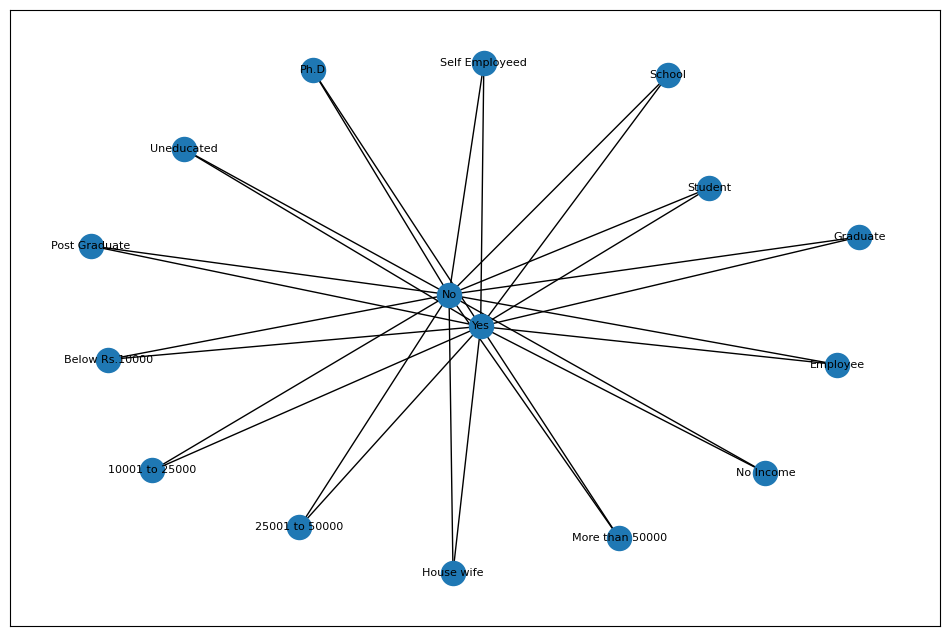

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Extract unique occupations, monthly incomes, event types, and educational qualifications from the dataset
occupations = set(df['Occupation'])
monthly_incomes = set(df['Monthly Income'])
event_types = set(df['Output'])
educational_qualifications = set(df['Educational Qualifications'])

# Add nodes for occupations and monthly incomes
G.add_nodes_from(occupations, bipartite=0)  # occupations are in set 0
G.add_nodes_from(monthly_incomes, bipartite=1)  # monthly incomes are in set 1

# Add nodes for event types and educational qualifications
G.add_nodes_from(event_types, bipartite=2)  # event types are in set 2
G.add_nodes_from(educational_qualifications, bipartite=3)  # educational qualifications are in set 3

# Add edges between nodes based on actor involvement
for _, row in df.iterrows():
    occupation = row['Occupation']
    monthly_income = row['Monthly Income']
    event_type = row['Output']
    educational_qualification = row['Educational Qualifications']

    # Add edges between occupation and event type
    G.add_edge(occupation, event_type)

    # Add edges between monthly income and event type
    G.add_edge(monthly_income, event_type)

    # Add edges between event type and educational qualification
    G.add_edge(event_type, educational_qualification)

# Extend the image size
plt.figure(figsize=(12, 8))  # Adjust the figsize as per your preference

# Visualize the graph
pos = nx.spring_layout(G, k=0.15)  # Adjust the layout algorithm and parameters as per your preference
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=8)  # Adjust font_size as per your preference
plt.show()


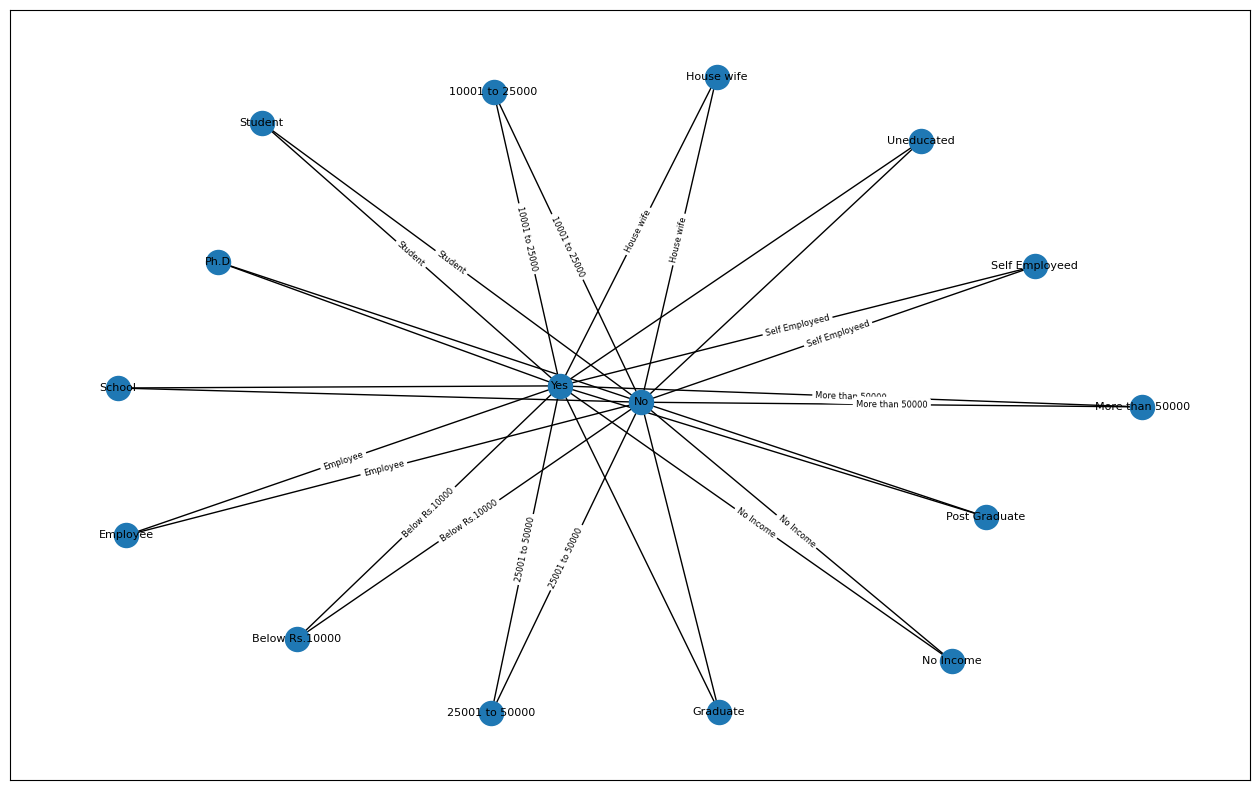

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Extract unique occupations, monthly incomes, outputs, and educational qualifications from the dataset
occupations = set(df['Occupation'])
monthly_incomes = set(df['Monthly Income'])
event_types = set(df['Output'])
educational_qualifications = set(df['Educational Qualifications'])

# Add nodes for occupations and monthly incomes
G.add_nodes_from(occupations, bipartite=0)  # occupations are in set 0
G.add_nodes_from(monthly_incomes, bipartite=1)  # monthly incomes are in set 1

# Add nodes for event types and educational qualifications
G.add_nodes_from(event_types, bipartite=2)  # event types are in set 2
G.add_nodes_from(educational_qualifications, bipartite=3)  # educational qualifications are in set 3

# Add edges between nodes based on actor involvement
for _, row in df.iterrows():
    occupation = row['Occupation']
    monthly_income = row['Monthly Income']
    event_type = row['Output']
    educational_qualification = row['Educational Qualifications']

    # Add edges between occupation and event type
    G.add_edge(occupation, event_type, actor=row['Occupation'])

    # Add edges between monthly income and event type
    G.add_edge(monthly_income, event_type, actor=row['Monthly Income'])

    # Add edges between event type and educational qualification
    G.add_edge(event_type, educational_qualification)

# Extend the image size
plt.figure(figsize=(16, 10))  # Adjust the figsize as per your preference

# Visualize the graph
pos = nx.spring_layout(G, k=0.1)  # Adjust the layout algorithm and parameters as per your preference
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=8)  # Adjust font_size as per your preference

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'actor')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6)

plt.show()


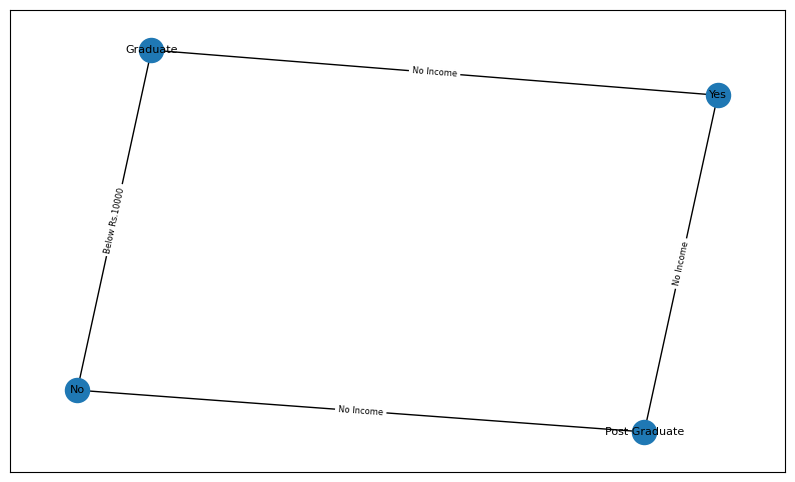

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter the data for Post Graduate and Graduate qualifications areas
filtered_data = df[(df['Educational Qualifications'] == 'Post Graduate') | (df['Educational Qualifications'] == 'Graduate')]

# Create an empty graph
G = nx.Graph()

# Extract unique administrative areas and event types from the filtered data
admin_areas = set(filtered_data['Educational Qualifications'])
outputs = set(filtered_data['Output'])

# Add nodes for administrative areas and event types
G.add_nodes_from(admin_areas, bipartite=0)  # administrative areas are in set 0
G.add_nodes_from(outputs, bipartite=1)  # event types are in set 1

# Add edges between administrative areas and event types based on actor involvement
for _, row in filtered_data.iterrows():
    edu_qualifications = row['Educational Qualifications']
    output = row['Output']
    actors_involved = [row['Occupation'], row['Monthly Income']]

    # Add edges between administrative area and event type for each actor involved
    for actor in actors_involved:
        G.add_edge(edu_qualifications, output, actor=actor)

# Extend the image size
plt.figure(figsize=(10, 6))  # Adjust the figsize as per your preference

# Visualize the graph
pos = nx.spring_layout(G, k=0.1)  # Adjust the layout algorithm and parameters as per your preference
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=8)  # Adjust font_size as per your preference

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'actor')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels,font_size=6)

plt.show()


# Visualize the conflicted areas in geopandas

In [ ]:
!pip install geopandas

<ipython-input-71-87f877cc2a3c>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


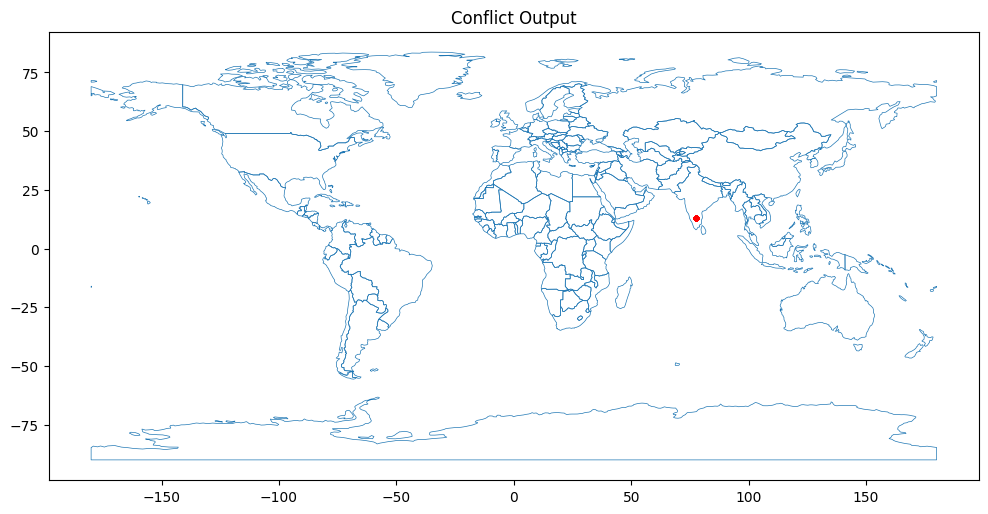

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the conflict events dataset
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# Plot the conflict events on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 10))
world.boundary.plot(ax=ax, linewidth=0.5)
gdf.plot(ax=ax, markersize=8, color='red')
plt.title('Conflict Output')
plt.show()


## Finding Degree Centrality

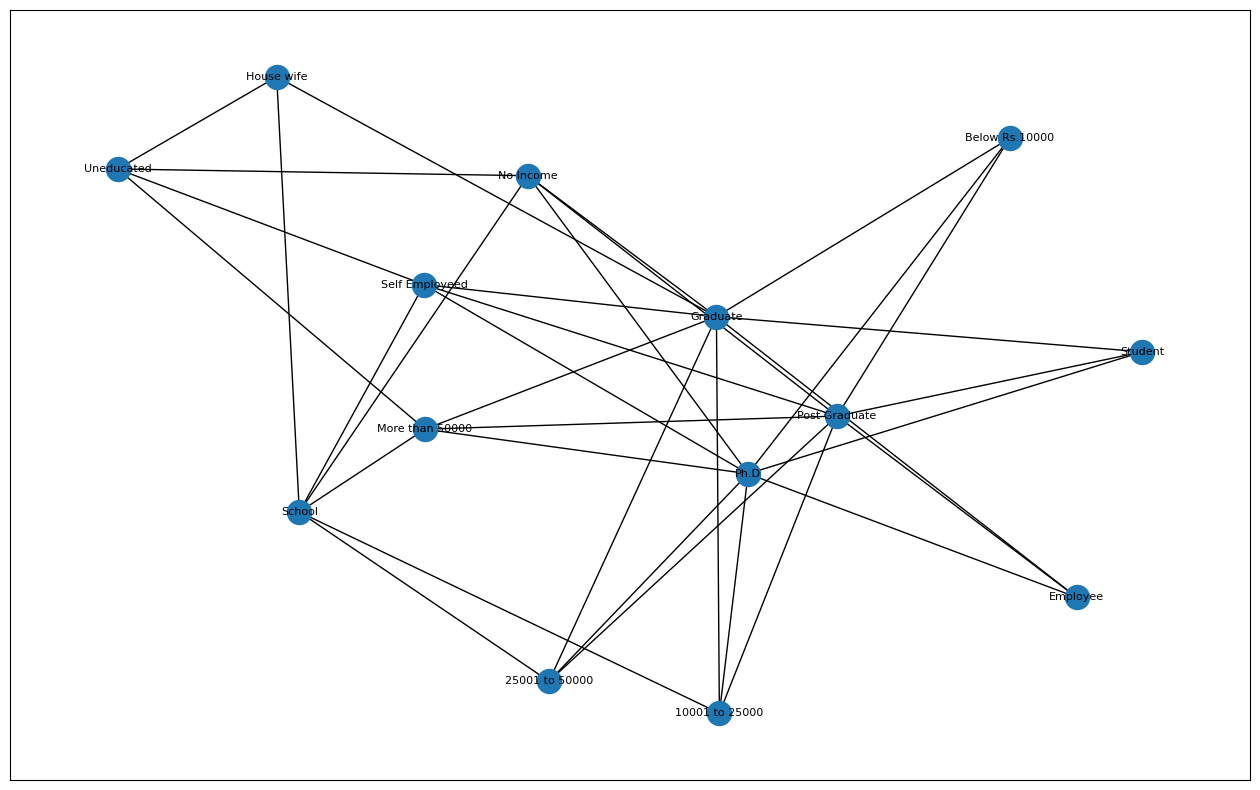

In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes for administrative areas
qualifications = set(df['Educational Qualifications'])
G.add_nodes_from(qualifications)

# Add edges between qualifications based on conflict output
for _, row in df.iterrows():
    edu__qualifications = row['Educational Qualifications']
    occupations = row['Occupation']
    income = row['Monthly Income']
    G.add_edge(edu__qualifications, occupations)
    G.add_edge(edu__qualifications, income)

# Extend the image size
plt.figure(figsize=(16, 10))

# Visualize the graph
pos = nx.spring_layout(G, k=0.1)
nx.draw_networkx(G, pos=pos, with_labels=True, font_size=8)

plt.show()


In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print centrality measures for each Qualifications
for edu_qualifications in qualifications:
    print(f"Educaition Qualifications: {edu_qualifications}")
    print(f"Degree Centrality: {degree_centrality[edu_qualifications]}")
    print(f"Betweenness Centrality: {betweenness_centrality[edu_qualifications]}")
    print("-----------------------------")

Educaition Qualifications: Post Graduate
Degree Centrality: 0.6153846153846154
Betweenness Centrality: 0.13610347985347984
-----------------------------
Educaition Qualifications: Ph.D
Degree Centrality: 0.6153846153846154
Betweenness Centrality: 0.13610347985347984
-----------------------------
Educaition Qualifications: Graduate
Degree Centrality: 0.6923076923076923
Betweenness Centrality: 0.22110805860805863
-----------------------------
Educaition Qualifications: School
Degree Centrality: 0.46153846153846156
Betweenness Centrality: 0.07110805860805859
-----------------------------
Educaition Qualifications: Uneducated
Degree Centrality: 0.3076923076923077
Betweenness Centrality: 0.02532051282051282
-----------------------------


## Finding Eccentricity of the above graph

{'Post Graduate': 3, 'Ph.D': 3, 'Graduate': 2, 'School': 3, 'Uneducated': 3, 'Student': 3, 'No Income': 2, 'Below Rs.10000': 3, 'Employee': 3, 'More than 50000': 2, 'Self Employeed': 2, '10001 to 25000': 3, '25001 to 50000': 3, 'House wife': 3}
diameter:3
radius:2


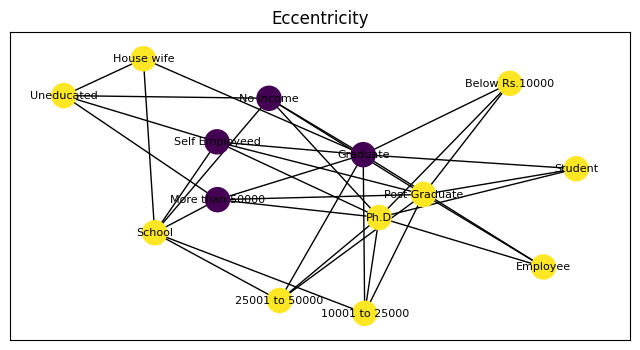

In [ ]:
eccentricities = nx.eccentricity(G)
print(eccentricities)
diameter = max(eccentricities.values())
print(f'diameter:{diameter}')
radius = min(eccentricities.values())
print(f'radius:{radius}')

#visualization
plt.figure(figsize=(8, 4))
colors = [eccentricities[node] for node in G.nodes]
nx.draw_networkx(G, pos, node_color=colors, with_labels=True, font_size=8)
plt.title('Eccentricity')
plt.show()


# Month with more reviews of every order time and which actors, qualifications and event was there?


In [ ]:
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
155,23,Female,Single,Student,No Income,Post Graduate,4,13.0487,77.5923,560024,...,Important,Important,Moderately Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
250,29,Female,Married,Employee,25001 to 50000,Ph.D,3,12.9847,77.5491,560100,...,Important,Important,Very Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,I believe more on quality than time of delivery
215,32,Male,Married,Self Employeed,10001 to 25000,School,3,12.9820,77.6256,560008,...,Unimportant,Slightly Important,Unimportant,Unimportant,Very Important,Very Important,Very Important,Very Important,Yes,Very few times I have had bad experienced by ...
210,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,12.9217,77.5936,560041,...,Important,Important,Very Important,Very Important,Moderately Important,Important,Important,Important,No,Food needs to have good quality. It leads me t...
367,27,Male,Married,Employee,25001 to 50000,Graduate,2,12.8845,77.6036,560076,...,Important,Moderately Important,Important,Moderately Important,Moderately Important,Important,Moderately Important,Moderately Important,Yes,I would avoid restaurants which has less rating


In [ ]:
# show which one is intger type or which one float type or object type

df.dtypes


Age                                            int64
Gender                                        object
Marital Status                                object
Occupation                                    object
Monthly Income                                object
Educational Qualifications                    object
Family size                                    int64
latitude                                     float64
longitude                                    float64
Pin code                                       int64
Medium (P1)                                   object
Medium (P2)                                   object
Meal(P1)                                      object
Meal(P2)                                      object
Perference(P1)                                object
Perference(P2)                                object
Ease and convenient                           object
Time saving                                   object
More restaurant choices                       

In [ ]:
# Encode the "Reviews" feature

df['Reviews'] = df['Reviews'].fillna('Unknown')
df['Reviews'] = df['Reviews'].factorize()[0]


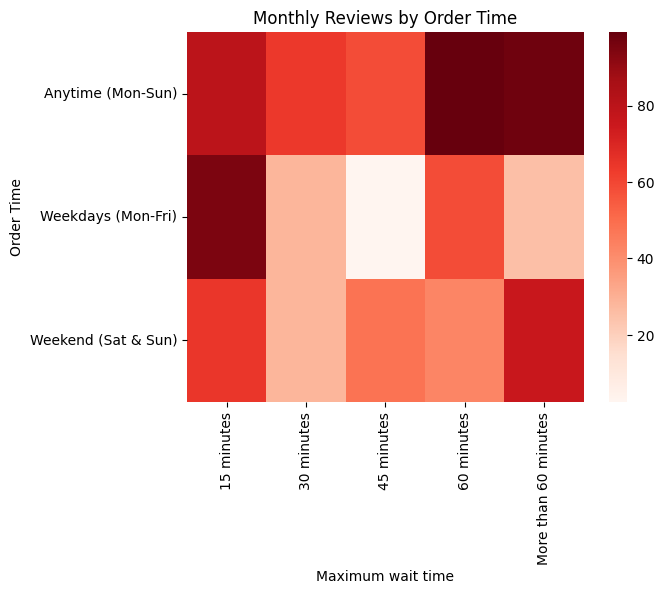


Months with Highest Average Reviews: 15 minutes

Actors Involved:
Employee           19
Student            17
No Income          14
25001 to 50000     10
More than 50000     8
10001 to 25000      5
Self Employeed      4
Below Rs.10000      3
dtype: int64

Educational Qualifications:
Graduate         23
Post Graduate    13
Ph.D              4
Name: Educational Qualifications, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = df

# Calculate the average Reviews by order time and maximum wating time
data_avg = data.groupby(['Order Time', 'Maximum wait time']).agg({'Reviews': 'mean'}).reset_index()

# Pivot the data to create a heatmap
data_pivot = data_avg.pivot_table(values='Reviews', index='Order Time', columns='Maximum wait time')

# Find the months with the highest average fatality
highest_months = data_pivot.mean().idxmax()

# Filter the data for the highest months
highest_data = data[(data['Order Time'].isin(data_pivot.index)) & (data['Maximum wait time'] == highest_months)]

# Analyze the actors involved
actors_involved = highest_data[['Occupation', 'Monthly Income']].stack().value_counts()

# Analyze the locations
locations = highest_data['Educational Qualifications'].value_counts()

# Create a heatmap using seaborn
sns.heatmap(data_pivot, cmap='Reds')

# Set plot title and axis labels
plt.title('Monthly Reviews by Order Time')
plt.xlabel('Maximum wait time')
plt.ylabel('Order Time')

# Display the plot
plt.show()

# Print the analysis results
print(f"\nMonths with Highest Average Reviews: {highest_months}")
print("\nActors Involved:")
print(actors_involved)
print("\nEducational Qualifications:")
print(locations)


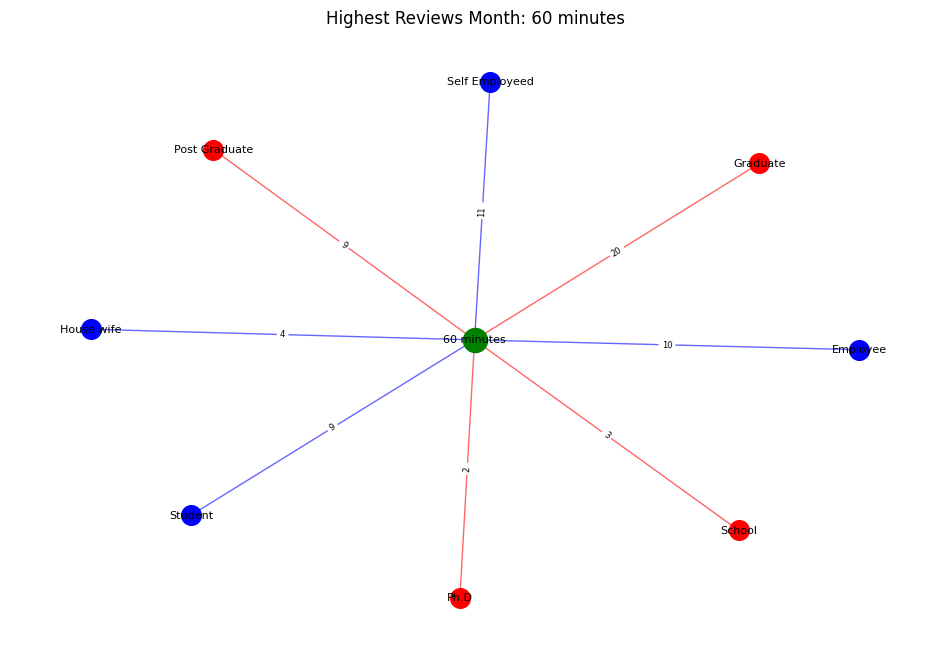

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = df

# Calculate the average Reviews by order time and maximum waiting time
data_avg = data.groupby(['Order Time', 'Maximum wait time']).agg({'Reviews': 'mean'}).reset_index()

# Find the maximum waitng time with the highest average reviews
highest_month = data_avg.loc[data_avg['Reviews'].idxmax(), 'Maximum wait time']

# Filter the data for the highest reviews maximum waitng time
highest_data = data[(data['Maximum wait time'] == highest_month)]

# Get the top 5 actors and qualifications with the highest counts
top_actors = highest_data['Occupation'].value_counts().nlargest(5).index.tolist()
top_locations = highest_data['Educational Qualifications'].value_counts().nlargest(5).index.tolist()

# Create a graph
graph = nx.Graph()

# Add nodes for actors and locations
graph.add_nodes_from(top_actors, bipartite='actors')
graph.add_nodes_from(top_locations, bipartite='locations')

# Add edges for actor-month and location-month relationships
actor_month_counts = highest_data.groupby(['Occupation', 'Maximum wait time']).size().reset_index(name='count')
location_month_counts = highest_data.groupby(['Educational Qualifications', 'Maximum wait time']).size().reset_index(name='count')

for _, row in actor_month_counts.iterrows():
    if row['Occupation'] in top_actors:
        graph.add_edge(row['Occupation'], row['Maximum wait time'], count=row['count'])

for _, row in location_month_counts.iterrows():
    if row['Educational Qualifications'] in top_locations:
        graph.add_edge(row['Educational Qualifications'], row['Maximum wait time'], count=row['count'])

# Set the layout for the graph
pos = nx.spring_layout(graph, seed=42)

# Plot the graph
plt.figure(figsize=(12, 8))

# Draw actor-month edges
actor_edges = [(actor, month) for actor, month, data in graph.edges(data=True) if graph.nodes[actor]['bipartite'] == 'actors']
nx.draw_networkx_edges(graph, pos, edgelist=actor_edges, width=1.0, alpha=0.6, edge_color='blue')

# Draw location-month edges
location_edges = [(location, month) for location, month, data in graph.edges(data=True) if graph.nodes[location]['bipartite'] == 'locations']
nx.draw_networkx_edges(graph, pos, edgelist=location_edges, width=1.0, alpha=0.6, edge_color='red')

# Draw actor and location nodes
nx.draw_networkx_nodes(graph, pos, nodelist=top_actors, node_color='blue', node_size=200)
nx.draw_networkx_nodes(graph, pos, nodelist=top_locations, node_color='red', node_size=200)

# Draw month nodes
nx.draw_networkx_nodes(graph, pos, nodelist=[highest_month], node_color='green', node_size=300)

# Draw labels
nx.draw_networkx_labels(graph, pos, font_size=8, font_color='black')

# Draw edge labels
edge_labels = {(u, v): data['count'] for u, v, data in graph.edges(data=True)}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)

# Set plot title and axis labels
plt.title(f'Highest Reviews Month: {highest_month}')
plt.xlabel('Actors / Locations')
plt.ylabel('Maximum wait time')

plt.axis('off')
plt.show()


In [ ]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

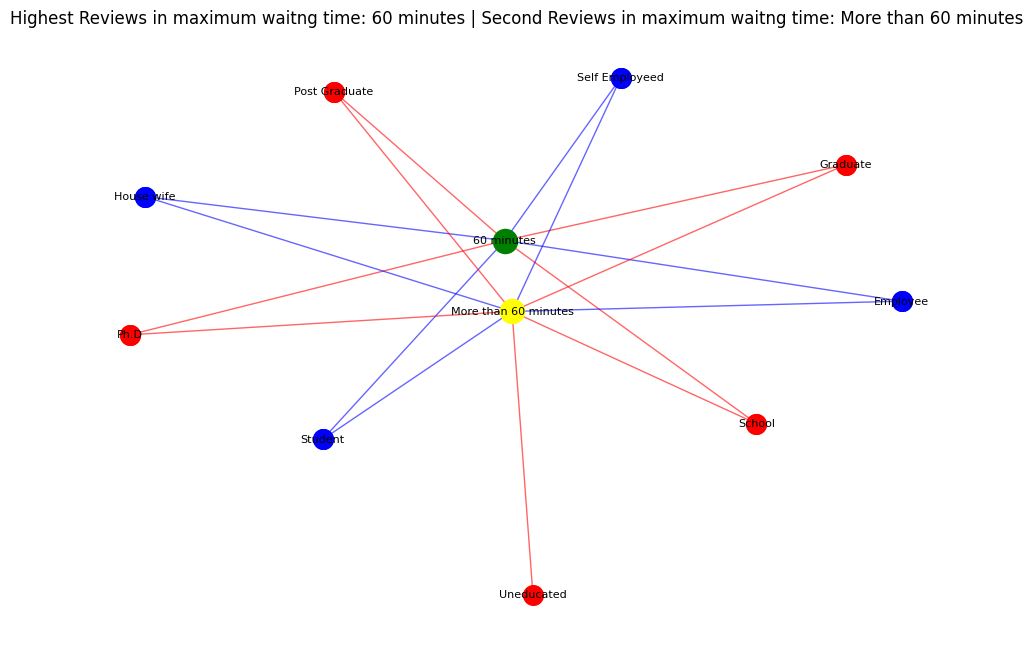

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = df

# Calculate the average fatalities by year and month
data_avg = data.groupby(['Order Time', 'Maximum wait time']).agg({'Reviews': 'mean'}).reset_index()

# Find the months with the highest and second highest average fatality
highest_month = data_avg.loc[data_avg['Reviews'].idxmax(), 'Maximum wait time']
data_avg = data_avg.drop(data_avg['Reviews'].idxmax())
second_highest_month = data_avg.loc[data_avg['Reviews'].idxmax(), 'Maximum wait time']

# Filter the data for the highest fatality month
highest_data = data[(data['Maximum wait time'] == highest_month)]

# Get the top 5 actors and locations with the highest counts for the highest month
top_actors = highest_data['Occupation'].value_counts().nlargest(5).index.tolist()
top_locations = highest_data['Educational Qualifications'].value_counts().nlargest(5).index.tolist()

# Create a graph
graph = nx.Graph()

# Add nodes for actors and locations
graph.add_nodes_from(top_actors, bipartite='actors')
graph.add_nodes_from(top_locations, bipartite='locations')

# Add edges for actor-month and location-month relationships for the highest month
actor_month_counts = highest_data.groupby(['Occupation', 'Maximum wait time']).size().reset_index(name='count')
location_month_counts = highest_data.groupby(['Educational Qualifications', 'Maximum wait time']).size().reset_index(name='count')

for _, row in actor_month_counts.iterrows():
    if row['Occupation'] in top_actors:
        graph.add_edge(row['Occupation'], row['Maximum wait time'], count=row['count'])

for _, row in location_month_counts.iterrows():
    if row['Educational Qualifications'] in top_locations:
        graph.add_edge(row['Educational Qualifications'], row['Maximum wait time'], count=row['count'])

# Filter the data for the second highest fatality month
second_highest_data = data[(data['Maximum wait time'] == second_highest_month)]

# Get the top 5 actors and locations with the highest counts for the second highest month
second_top_actors = second_highest_data['Occupation'].value_counts().nlargest(5).index.tolist()
second_top_locations = second_highest_data['Educational Qualifications'].value_counts().nlargest(5).index.tolist()

# Add nodes for actors and locations for the second highest month
graph.add_nodes_from(second_top_actors, bipartite='actors')
graph.add_nodes_from(second_top_locations, bipartite='locations')

# Add edges for actor-month and location-month relationships for the second highest month
actor_month_counts = second_highest_data.groupby(['Occupation', 'Maximum wait time']).size().reset_index(name='count')
location_month_counts = second_highest_data.groupby(['Educational Qualifications', 'Maximum wait time']).size().reset_index(name='count')

for _, row in actor_month_counts.iterrows():
    if row['Occupation'] in second_top_actors:
        graph.add_edge(row['Occupation'], row['Maximum wait time'], count=row['count'])

for _, row in location_month_counts.iterrows():
    if row['Educational Qualifications'] in second_top_locations:
        graph.add_edge(row['Educational Qualifications'], row['Maximum wait time'], count=row['count'])

# Set the layout for the graph
pos = nx.spring_layout(graph, seed=42)

# Plot the graph
plt.figure(figsize=(12, 8))

# Draw actor-month edges for the highest month
actor_edges = [(actor, month) for actor, month, data in graph.edges(data=True) if graph.nodes[actor]['bipartite'] == 'actors' and month == highest_month]
actor_weights = [data['count'] for actor, month, data in graph.edges(data=True) if graph.nodes[actor]['bipartite'] == 'actors' and month == highest_month]
nx.draw_networkx_edges(graph, pos, edgelist=actor_edges, alpha=0.6, edge_color='blue', )

# Draw location-month edges for the highest month
location_edges = [(location, month) for location, month, data in graph.edges(data=True) if graph.nodes[location]['bipartite'] == 'locations' and month == highest_month]
location_weights = [data['count'] for location, month, data in graph.edges(data=True) if graph.nodes[location]['bipartite'] == 'locations' and month == highest_month]
nx.draw_networkx_edges(graph, pos, edgelist=location_edges, alpha=0.6, edge_color='red', )

# Draw actor-month edges for the second highest month
actor_edges = [(actor, month) for actor, month, data in graph.edges(data=True) if graph.nodes[actor]['bipartite'] == 'actors' and month == second_highest_month]
actor_weights = [data['count'] for actor, month, data in graph.edges(data=True) if graph.nodes[actor]['bipartite'] == 'actors' and month == second_highest_month]
nx.draw_networkx_edges(graph, pos, edgelist=actor_edges, alpha=0.6, edge_color='blue')

# Draw location-month edges for the second highest month
location_edges = [(location, month) for location, month, data in graph.edges(data=True) if graph.nodes[location]['bipartite'] == 'locations' and month == second_highest_month]
location_weights = [data['count'] for location, month, data in graph.edges(data=True) if graph.nodes[location]['bipartite'] == 'locations' and month == second_highest_month]
nx.draw_networkx_edges(graph, pos, edgelist=location_edges, alpha=0.6, edge_color='red')

# Draw actor and location nodes
nx.draw_networkx_nodes(graph, pos, nodelist=top_actors, node_color='blue', node_size=200)
nx.draw_networkx_nodes(graph, pos, nodelist=top_locations, node_color='red', node_size=200)
nx.draw_networkx_nodes(graph, pos, nodelist=second_top_actors, node_color='blue', node_size=200)
nx.draw_networkx_nodes(graph, pos, nodelist=second_top_locations, node_color='red', node_size=200)

# Draw month nodes
nx.draw_networkx_nodes(graph, pos, nodelist=[highest_month], node_color='green', node_size=300)
nx.draw_networkx_nodes(graph, pos, nodelist=[second_highest_month], node_color='yellow', node_size=300)

# Draw labels
nx.draw_networkx_labels(graph, pos, font_size=8, font_color='black')

# Set plot title and axis labels
plt.title(f'Highest Reviews in maximum waitng time: {highest_month} | Second Reviews in maximum waitng time: {second_highest_month}')
plt.xlabel('Actors / Qualifications')
plt.ylabel('Waiting time')

plt.axis('off')
plt.show()
